![](images/synthetic_data_0.png)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv('data/diabetes.csv')

In [26]:
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    169.0  33.6   
1            1.0     85.0           66.0           29.0     58.6  26.6   
2            8.0    183.0           64.0           25.8    164.6  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            5.8    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0    165.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           35.2    134.2  30.1   
767          1.0     93.0           70.0           31.0     66.6  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0        1  
1                       0.351  31.0        0  
2                       0.672  32.0        1  
3                       0.167  21.0        0  
4                       2.288  33.0        1  
..                        ...   ...      ...  
763                     0.171  63.0        0  
764                     0.340  27.0        0  
765                     0.245  30.0        0  
766                     0.349  47.0        1  
767                     0.315  23.0        0  

[768 rows x 9 columns]

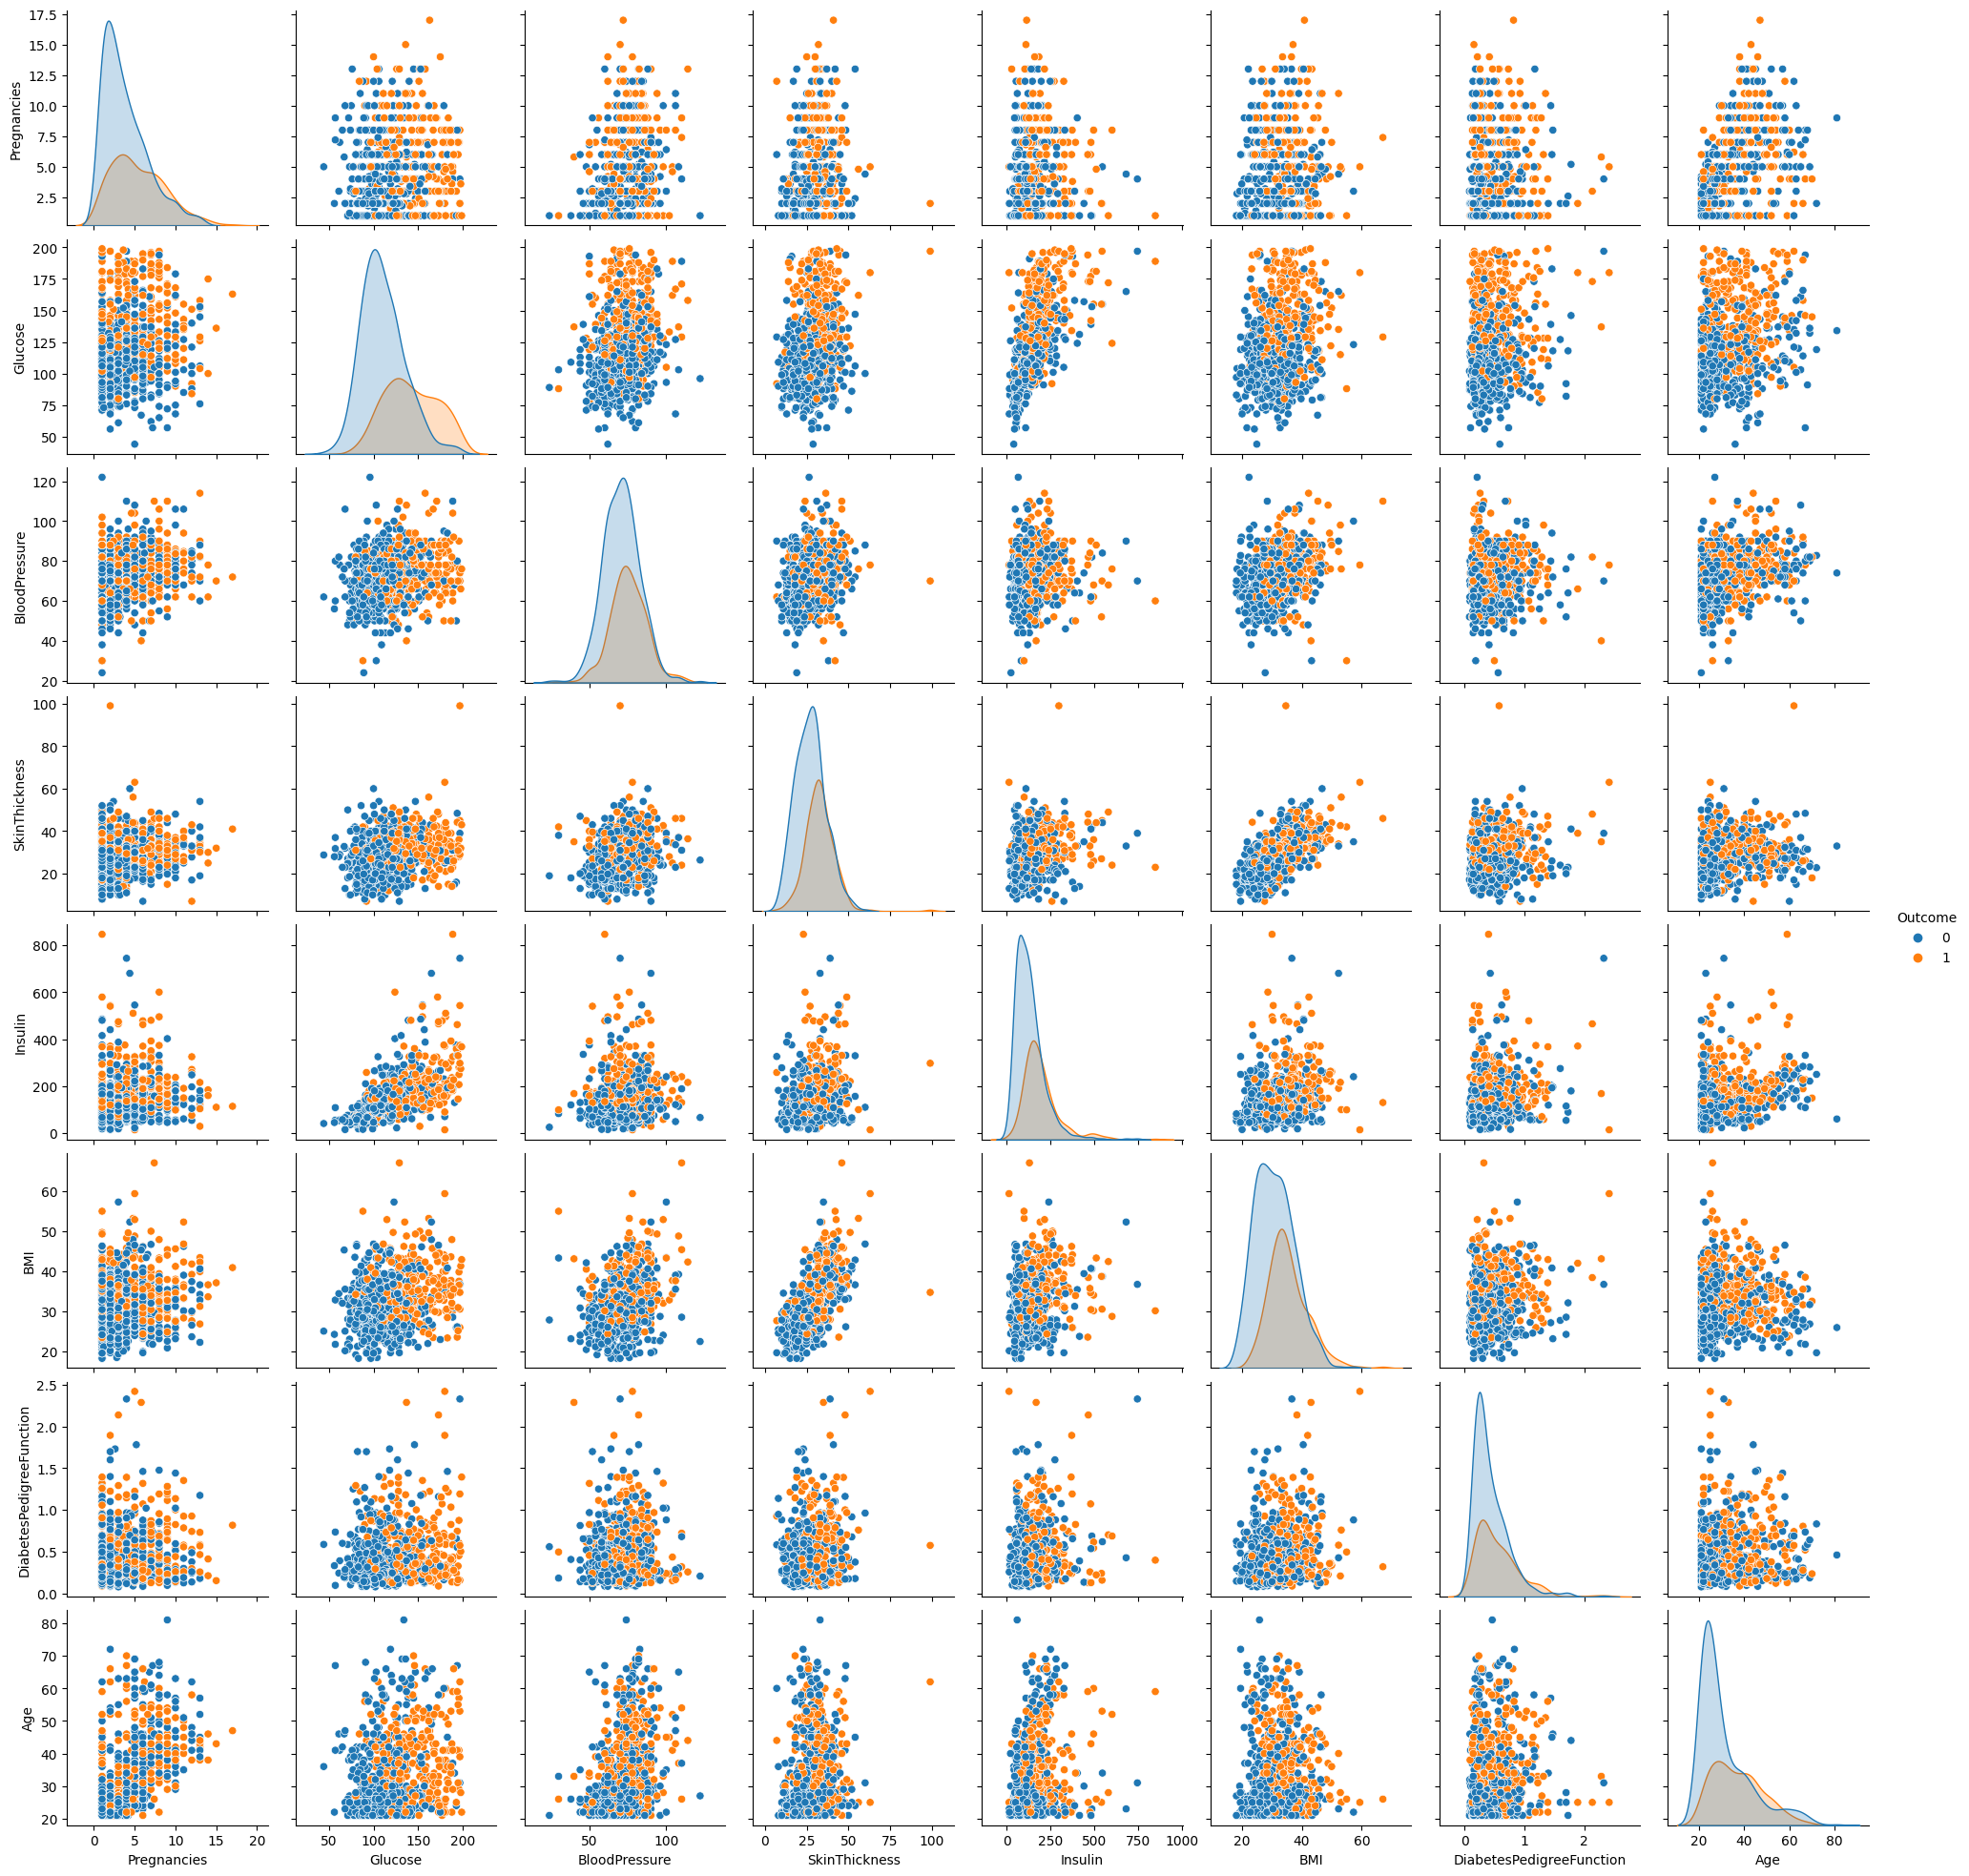

In [27]:
sns.pairplot(data, hue='Outcome')

In [28]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

## Using SDV

In [29]:
from sdv.tabular import GaussianCopula

model = GaussianCopula()
model.fit(data)



/home/alabarga/BSC/code/environments/syntheticdata/lib/python3.10/site-packages/rdt/transformers/numerical.py:100: UserWarning:

No rounding scheme detected for column 'BMI'. Data will not be rounded.



In [30]:
new_data = model.sample(num_rows=1000)

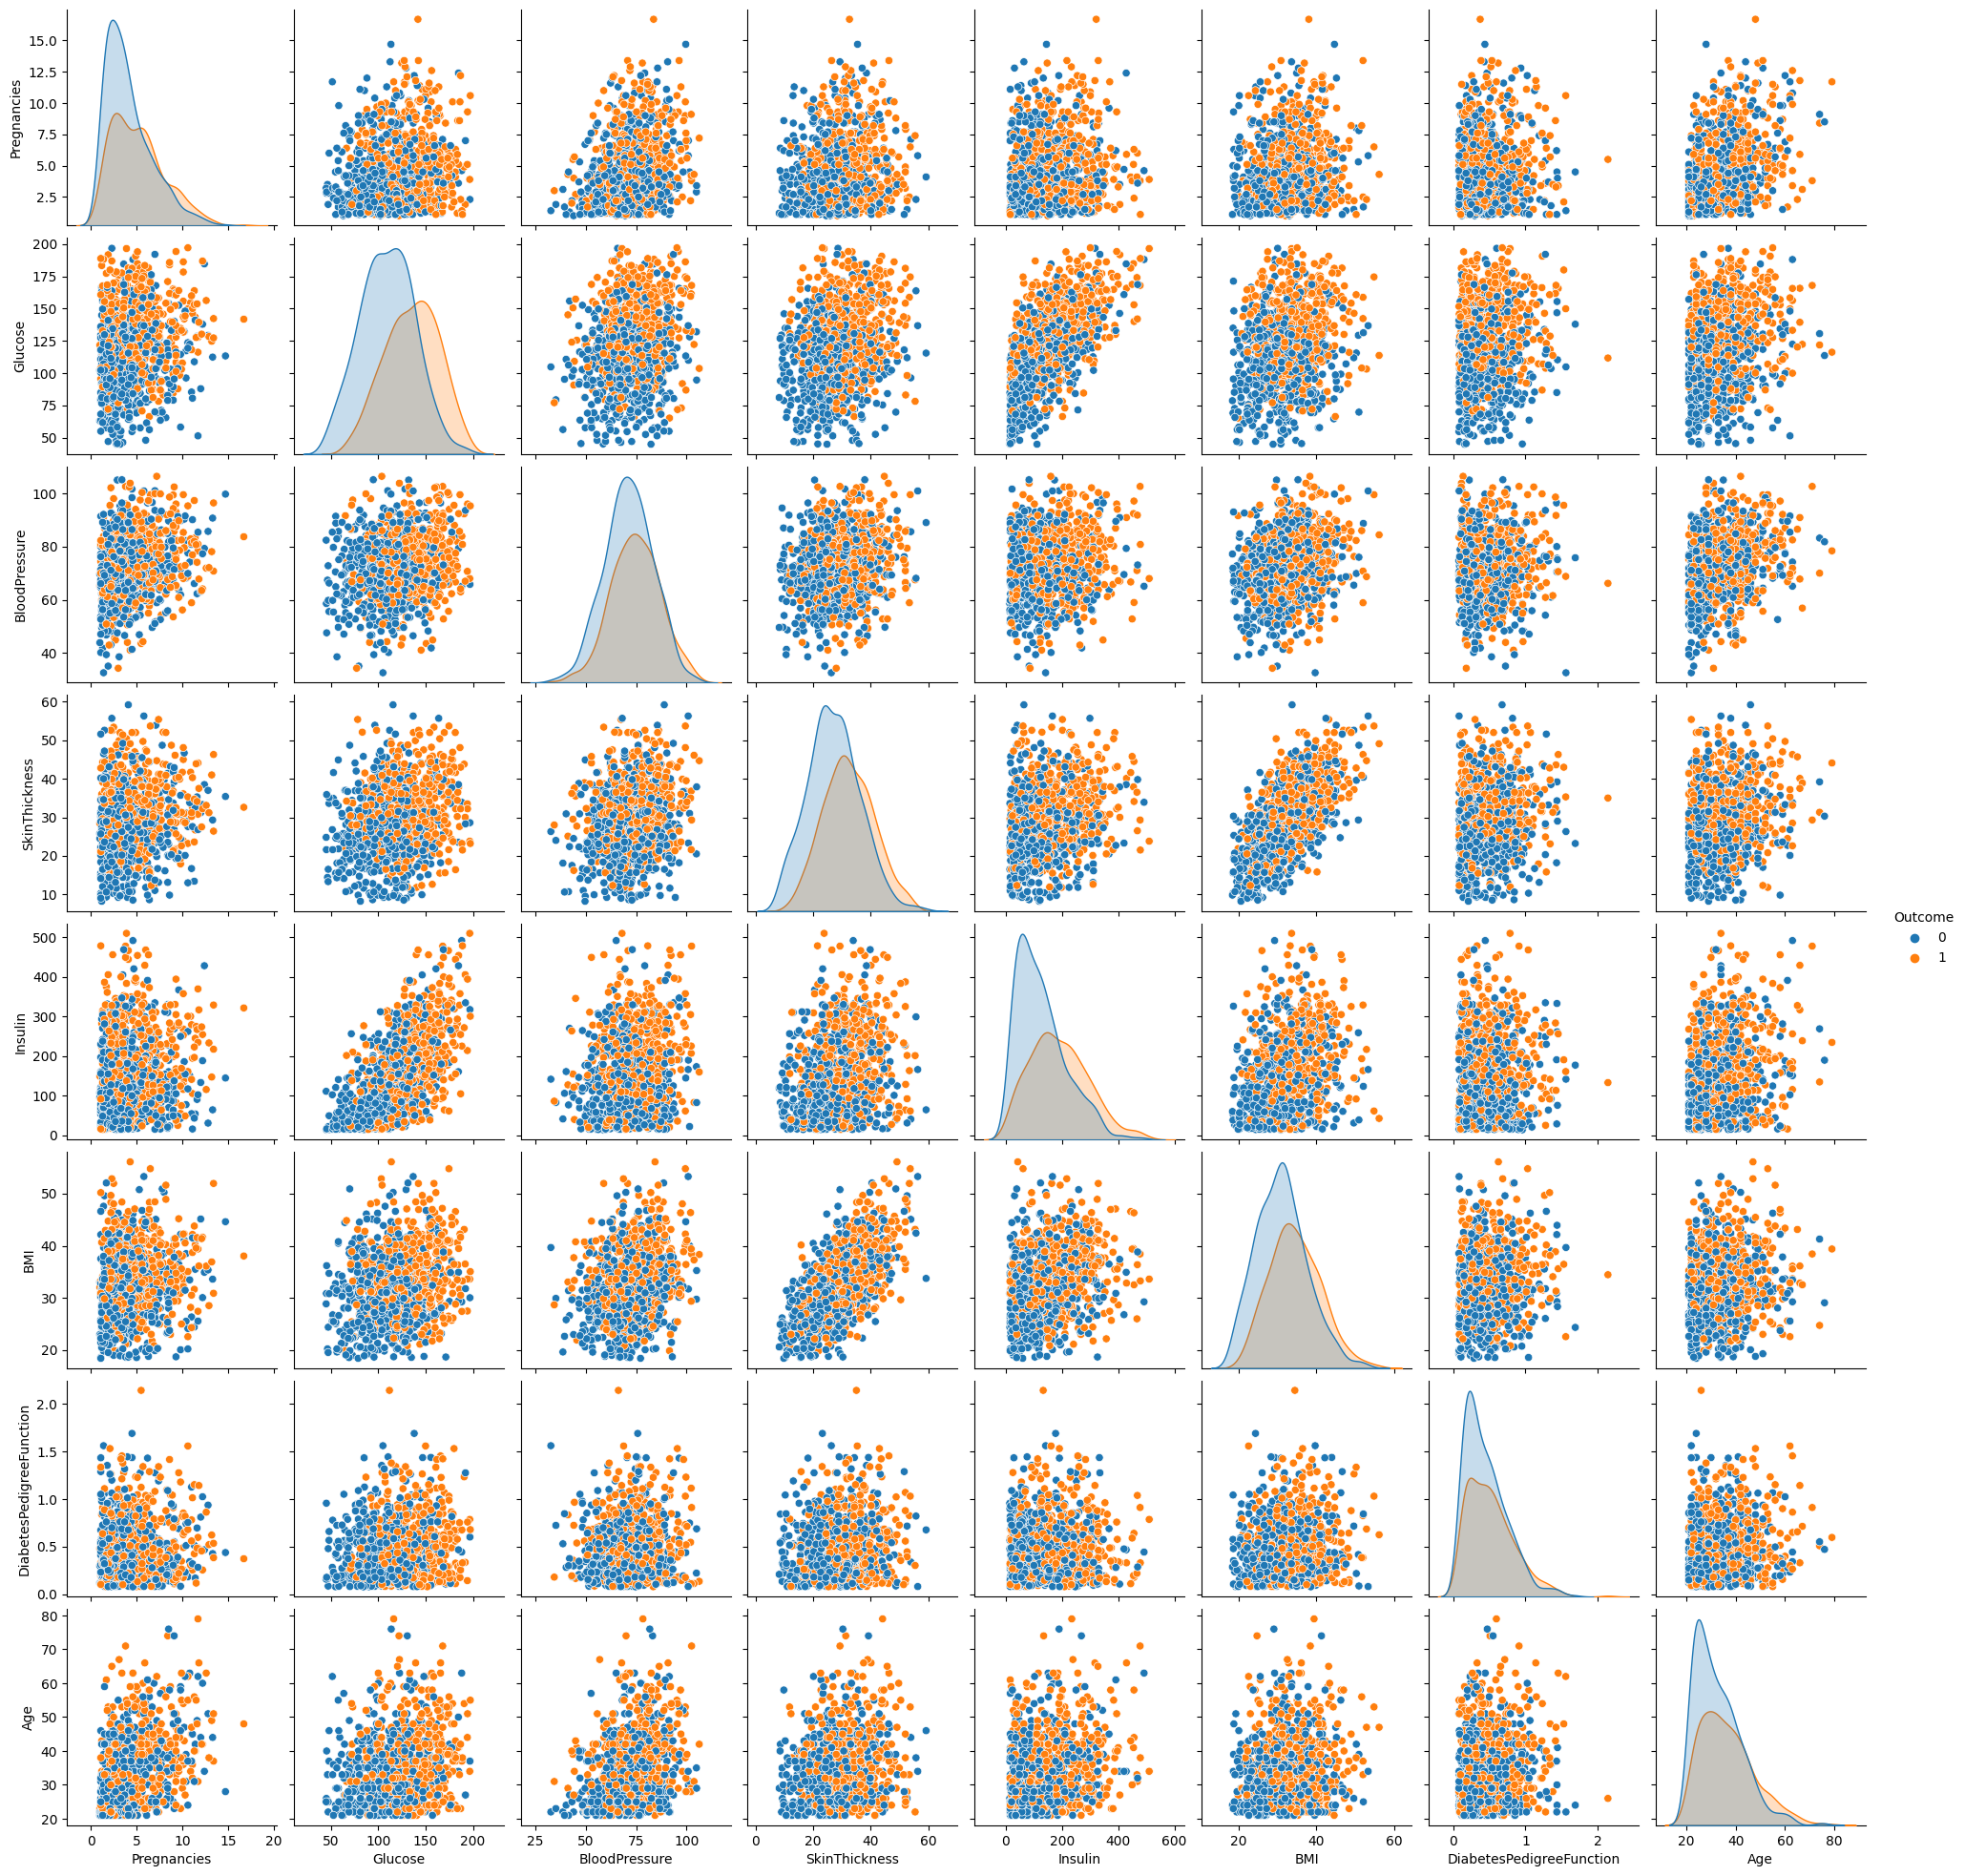

In [31]:
sns.pairplot(new_data, hue='Outcome')

In [32]:
from sdmetrics.reports.single_table import QualityReport

In [33]:
report = QualityReport()

In [34]:
from sdv import Metadata

In [35]:
metadata = Metadata()

In [17]:
metadata.add_table('diabetes', data)

In [18]:
metadata.get_table_meta('diabetes')

{'fields': {'Pregnancies': {'type': 'numerical', 'subtype': 'integer'},
  'Glucose': {'type': 'numerical', 'subtype': 'integer'},
  'BloodPressure': {'type': 'numerical', 'subtype': 'integer'},
  'SkinThickness': {'type': 'numerical', 'subtype': 'integer'},
  'Insulin': {'type': 'numerical', 'subtype': 'integer'},
  'BMI': {'type': 'numerical', 'subtype': 'float'},
  'DiabetesPedigreeFunction': {'type': 'numerical', 'subtype': 'float'},
  'Age': {'type': 'numerical', 'subtype': 'integer'},
  'Outcome': {'type': 'numerical', 'subtype': 'integer'}}}

In [19]:
results = report.generate(data, new_data, metadata.get_table_meta('diabetes'))

Creating report: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 44.64it/s]


Overall Quality Score: 90.23%

Properties:
Column Shapes: 83.9%
Column Pair Trends: 96.55%


In [20]:
report.get_visualization('Column Pair Trends')

In [21]:
from sdmetrics.reports.utils import get_column_plot

In [23]:
get_column_plot(
    real_data=data,
    synthetic_data=new_data,
    metadata=metadata.get_table_meta('diabetes'),
    column_name='BloodPressure'
)